# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy with full capital.
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    4. If you have free cash, use it all when fresh lows are set.
    
    (Scaling out)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
165,2019-11-25,26.20,2019-12-02,27.17,0.97,382.18,394,11077.16,
166,2019-11-25,26.20,2019-12-03,27.77,1.57,620.15,395,11697.31,
167,2019-12-09,26.92,2019-12-13,27.72,0.80,321.60,402,12018.91,
168,2019-12-09,26.92,2019-12-23,27.77,0.85,342.55,403,12361.46,
169,2019-12-20,27.13,2019-12-23,27.77,0.64,2.56,4,12364.02,
170,2019-12-20,27.13,2019-12-24,28.66,1.53,622.71,407,12986.73,
171,2020-01-08,28.35,2020-01-21,28.95,0.60,243.00,405,13229.73,
172,2020-01-08,28.35,2020-01-24,29.22,0.87,352.35,405,13582.08,
173,2020-01-28,28.31,2020-02-14,28.31,0.00,0.00,832,13582.08,
174,2020-02-04,28.05,2020-02-14,28.31,0.26,0.26,1,13582.34,


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-02-10,23748.94,23340.77,23648.98,833,0.11,-
2020-02-11,23765.60,23382.42,23682.30,833,0.11,-
2020-02-12,23665.64,23390.75,23424.07,833,0.11,-
2020-02-13,23815.58,23499.04,23590.67,833,0.11,-
2020-02-14,23582.34,23582.34,23582.34,0,23582.34,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                   2007-03-08
end                                                     2020-02-14
beginning_balance                                            10000
ending_balance                                            23582.34
total_net_profit                                          13582.34
gross_profit                                              34436.28
gross_loss                                               -20853.94
profit_factor                                                 1.65
return_on_initial_capital                                   135.82
annual_return_rate                                            6.86
trading_period                           12 years 11 months 6 days
pct_time_in_market                                           29.12
total_num_trades                                               175
trades_per_year                                              13.53
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-02-14 00:00:00 SELL 260 GDX @ 28.31


Plot Equity Curves: Strategy vs Benchmark

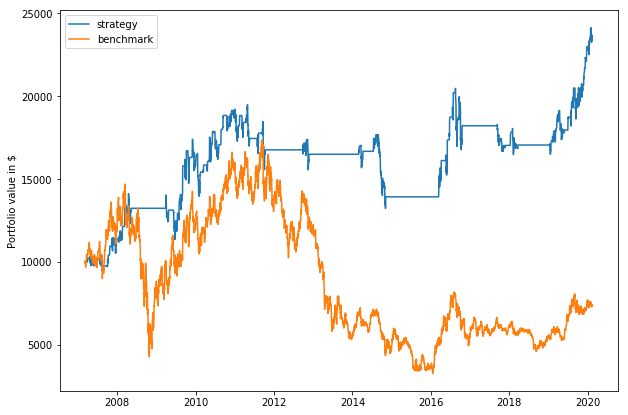

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

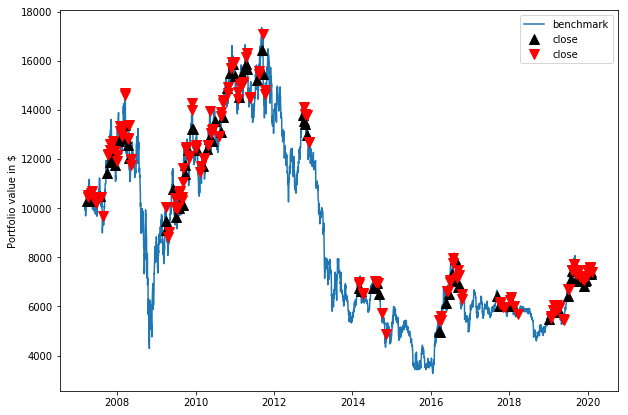

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.86,-2.31
max_closed_out_drawdown,-32.14,-81.15
drawdown_annualized_return,-4.69,35.12
drawdown_recovery,-3.52,-4.36
best_month,22.97,67.61
worst_month,-17.70,-52.01
sharpe_ratio,0.46,0.15
sortino_ratio,0.38,0.23
monthly_std,3.99,10.61


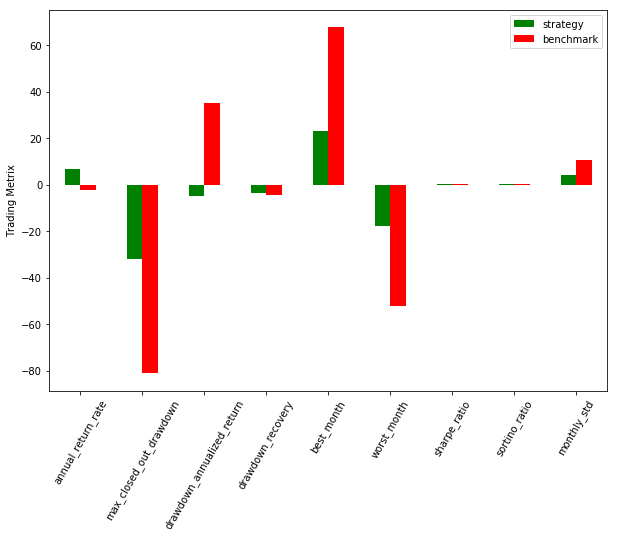

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df